# Diabetes Prediction

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing Dataset

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Checking for outliers

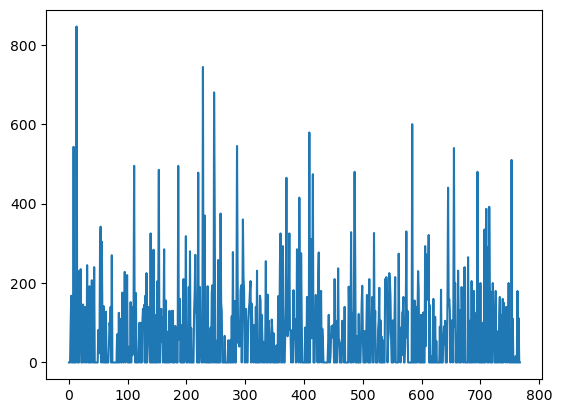

In [4]:
plt.plot(df.Insulin)
plt.show()

In [5]:
#No outliers as such in Insulin column

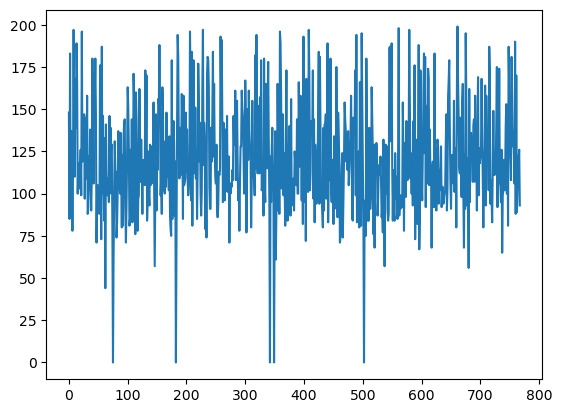

In [6]:
plt.plot(df.Glucose)
plt.show()

In [7]:
# There are some rows where Glucose level is 0 which is not possible.
# Will remove them as they might reduce the accuracy of the model

In [8]:
df.nsmallest(n = 7 ,columns = 'Glucose')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1
62,5,44,62,0,0,25.0,0.587,36,0
680,2,56,56,28,45,24.2,0.332,22,0


In [9]:
df.drop(df.Glucose[df.Glucose == 0].index, inplace=True)

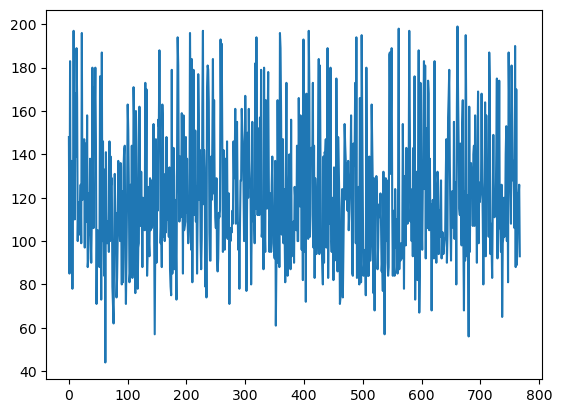

In [10]:
plt.plot(df.Glucose)
plt.show()

In [11]:
# Now plot looks better as there are no outliers

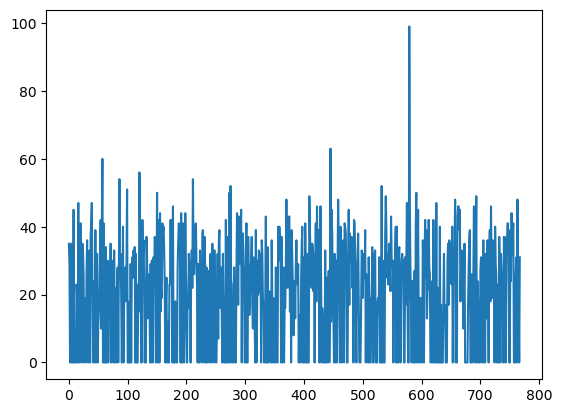

In [12]:
plt.plot(df.SkinThickness)
plt.show()

In [13]:
df.nlargest(n = 5, columns= 'SkinThickness')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1
445,0,180,78,63,14,59.4,2.420,25,1
57,0,100,88,60,110,46.8,0.962,31,0
120,0,162,76,56,100,53.2,0.759,25,1
86,13,106,72,54,0,36.6,0.178,45,0


In [14]:
# There is one row where SkinThickness is extremely high. Removing it

In [15]:
df.drop(579, inplace=True)

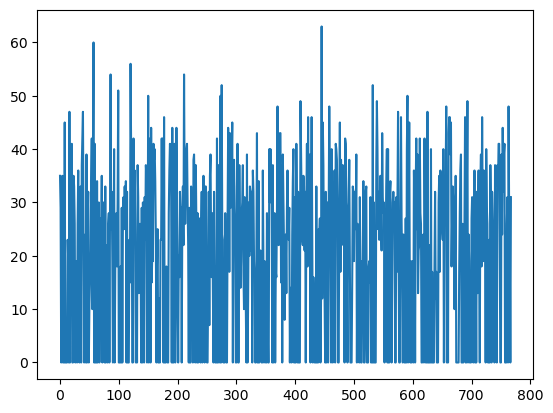

In [16]:
plt.plot(df.SkinThickness)
plt.show()

In [17]:
# Now it is perfect

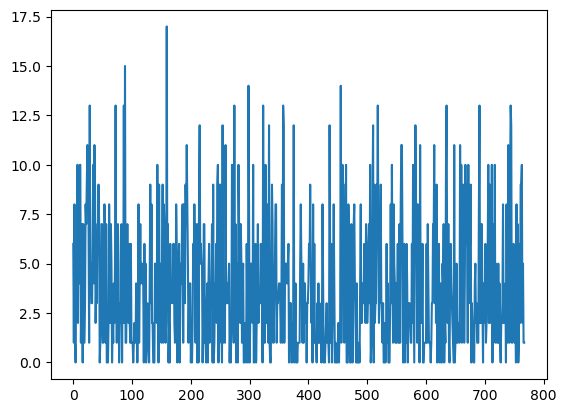

In [18]:
plt.plot(df.Pregnancies)
plt.show()

In [19]:
# There are no such outlier in the Pregnancies column. Nothing to do here

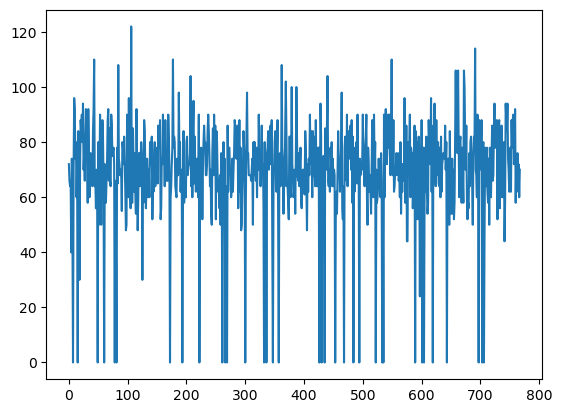

In [20]:
plt.plot(df.BloodPressure)
plt.show()

In [21]:
# Person cannot have 0 BP. Removing them and filling them with appropriate value

In [22]:
df.BloodPressure.replace(0, np.nan, inplace=True)

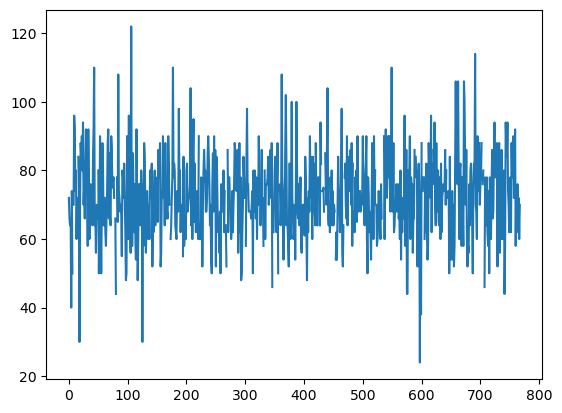

In [23]:
plt.plot(df.BloodPressure)
plt.show()

In [24]:
# Checking whether there is a lot a difference between mean and median to fill in the null values

In [25]:
df.BloodPressure.mean(), df.BloodPressure.median()

(72.44154057771664, 72.0)

In [26]:
df.fillna(value=df.BloodPressure.median(), inplace = True)

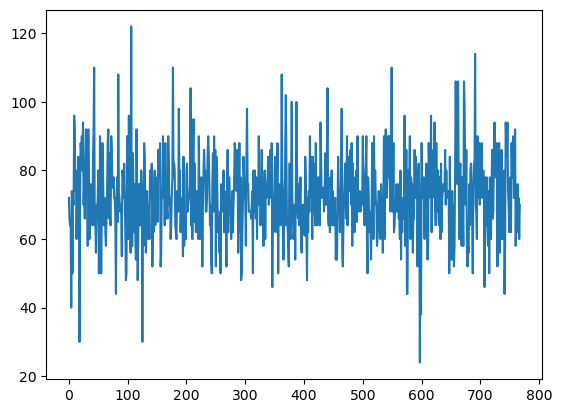

In [27]:
plt.plot(df.BloodPressure)
plt.show()

In [28]:
# Now BloodPressure column looks fine

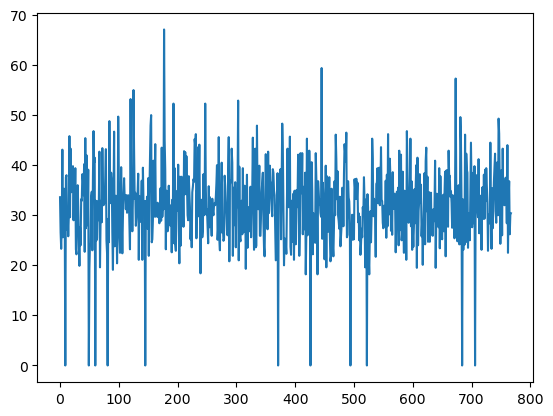

In [29]:
plt.plot(df.BMI)
plt.show()

In [30]:
# Looks like there are wrong values in BMI column as person cannot have 0 BMI

In [31]:
df.nsmallest(n=10, columns='BMI')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96.0,0,0,0.0,0.232,54,1
49,7,105,72.0,0,0,0.0,0.305,24,0
60,2,84,72.0,0,0,0.0,0.304,21,0
81,2,74,72.0,0,0,0.0,0.102,22,0
145,0,102,75.0,23,0,0.0,0.572,21,0
371,0,118,64.0,23,89,0.0,1.731,21,0
426,0,94,72.0,0,0,0.0,0.256,25,0
494,3,80,72.0,0,0,0.0,0.174,22,0
522,6,114,72.0,0,0,0.0,0.189,26,0
684,5,136,82.0,0,0,0.0,0.640,69,0


In [32]:
df.BMI.replace(0.0, np.nan, inplace=True)

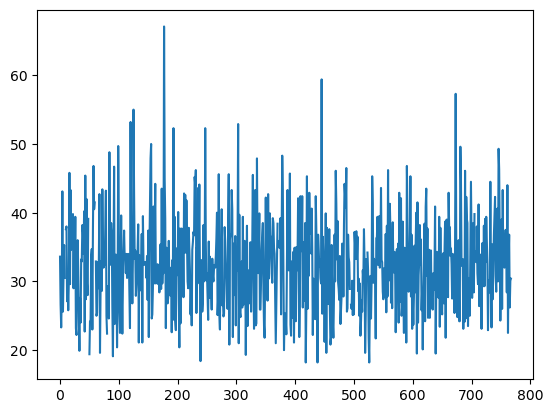

In [33]:
plt.plot(df.BMI)
plt.show()

In [34]:
df.BMI.mean(), df.BMI.median()

(32.451664447403466, 32.3)

In [35]:
# No difference in mean and median. so either of them can work for imputing

In [36]:
df.fillna(value=df.BMI.median(), inplace = True)

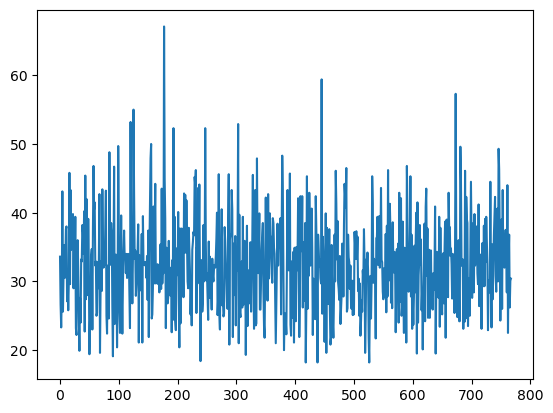

In [37]:
plt.plot(df.BMI)
plt.show()

In [38]:
# BMI column looks fine now

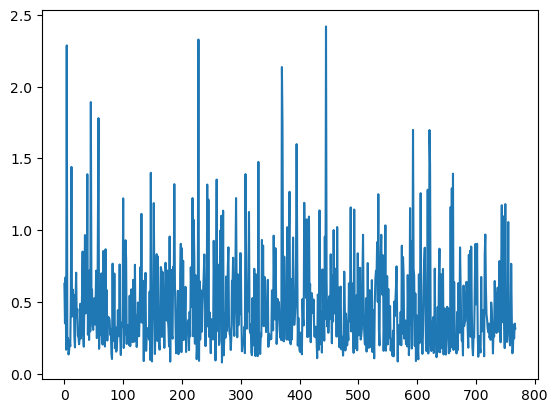

In [39]:
plt.plot(df.DiabetesPedigreeFunction)
plt.show()

In [40]:
# Data distribution in this column looks fine.

### Checking relation between data

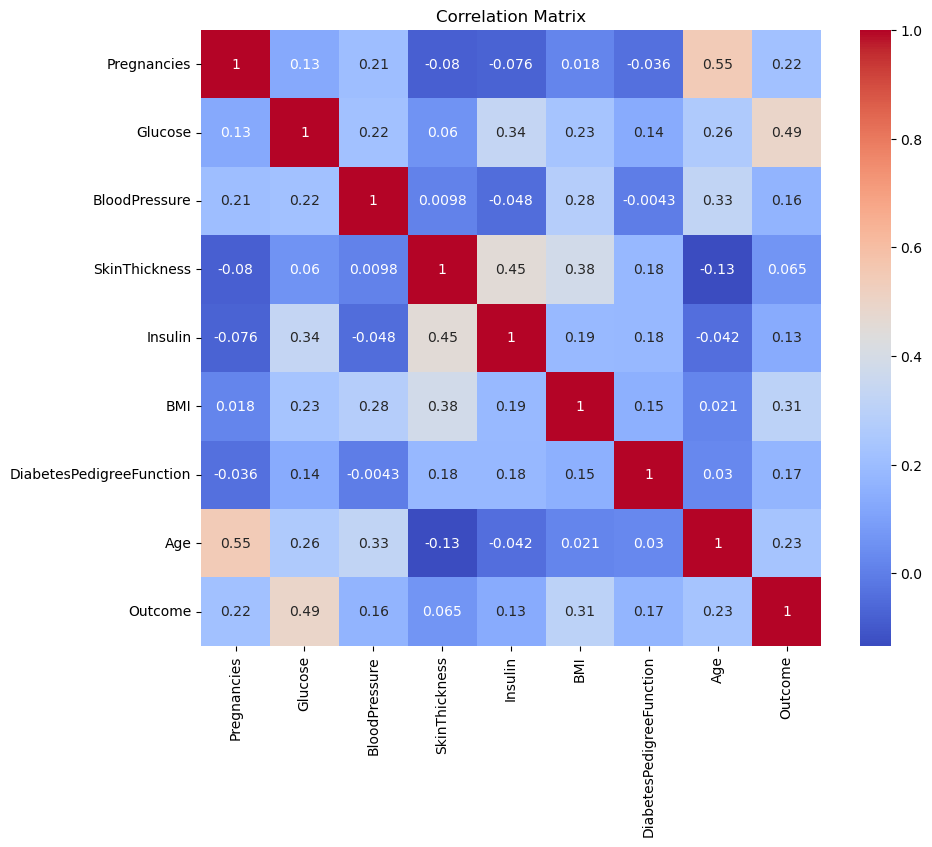

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

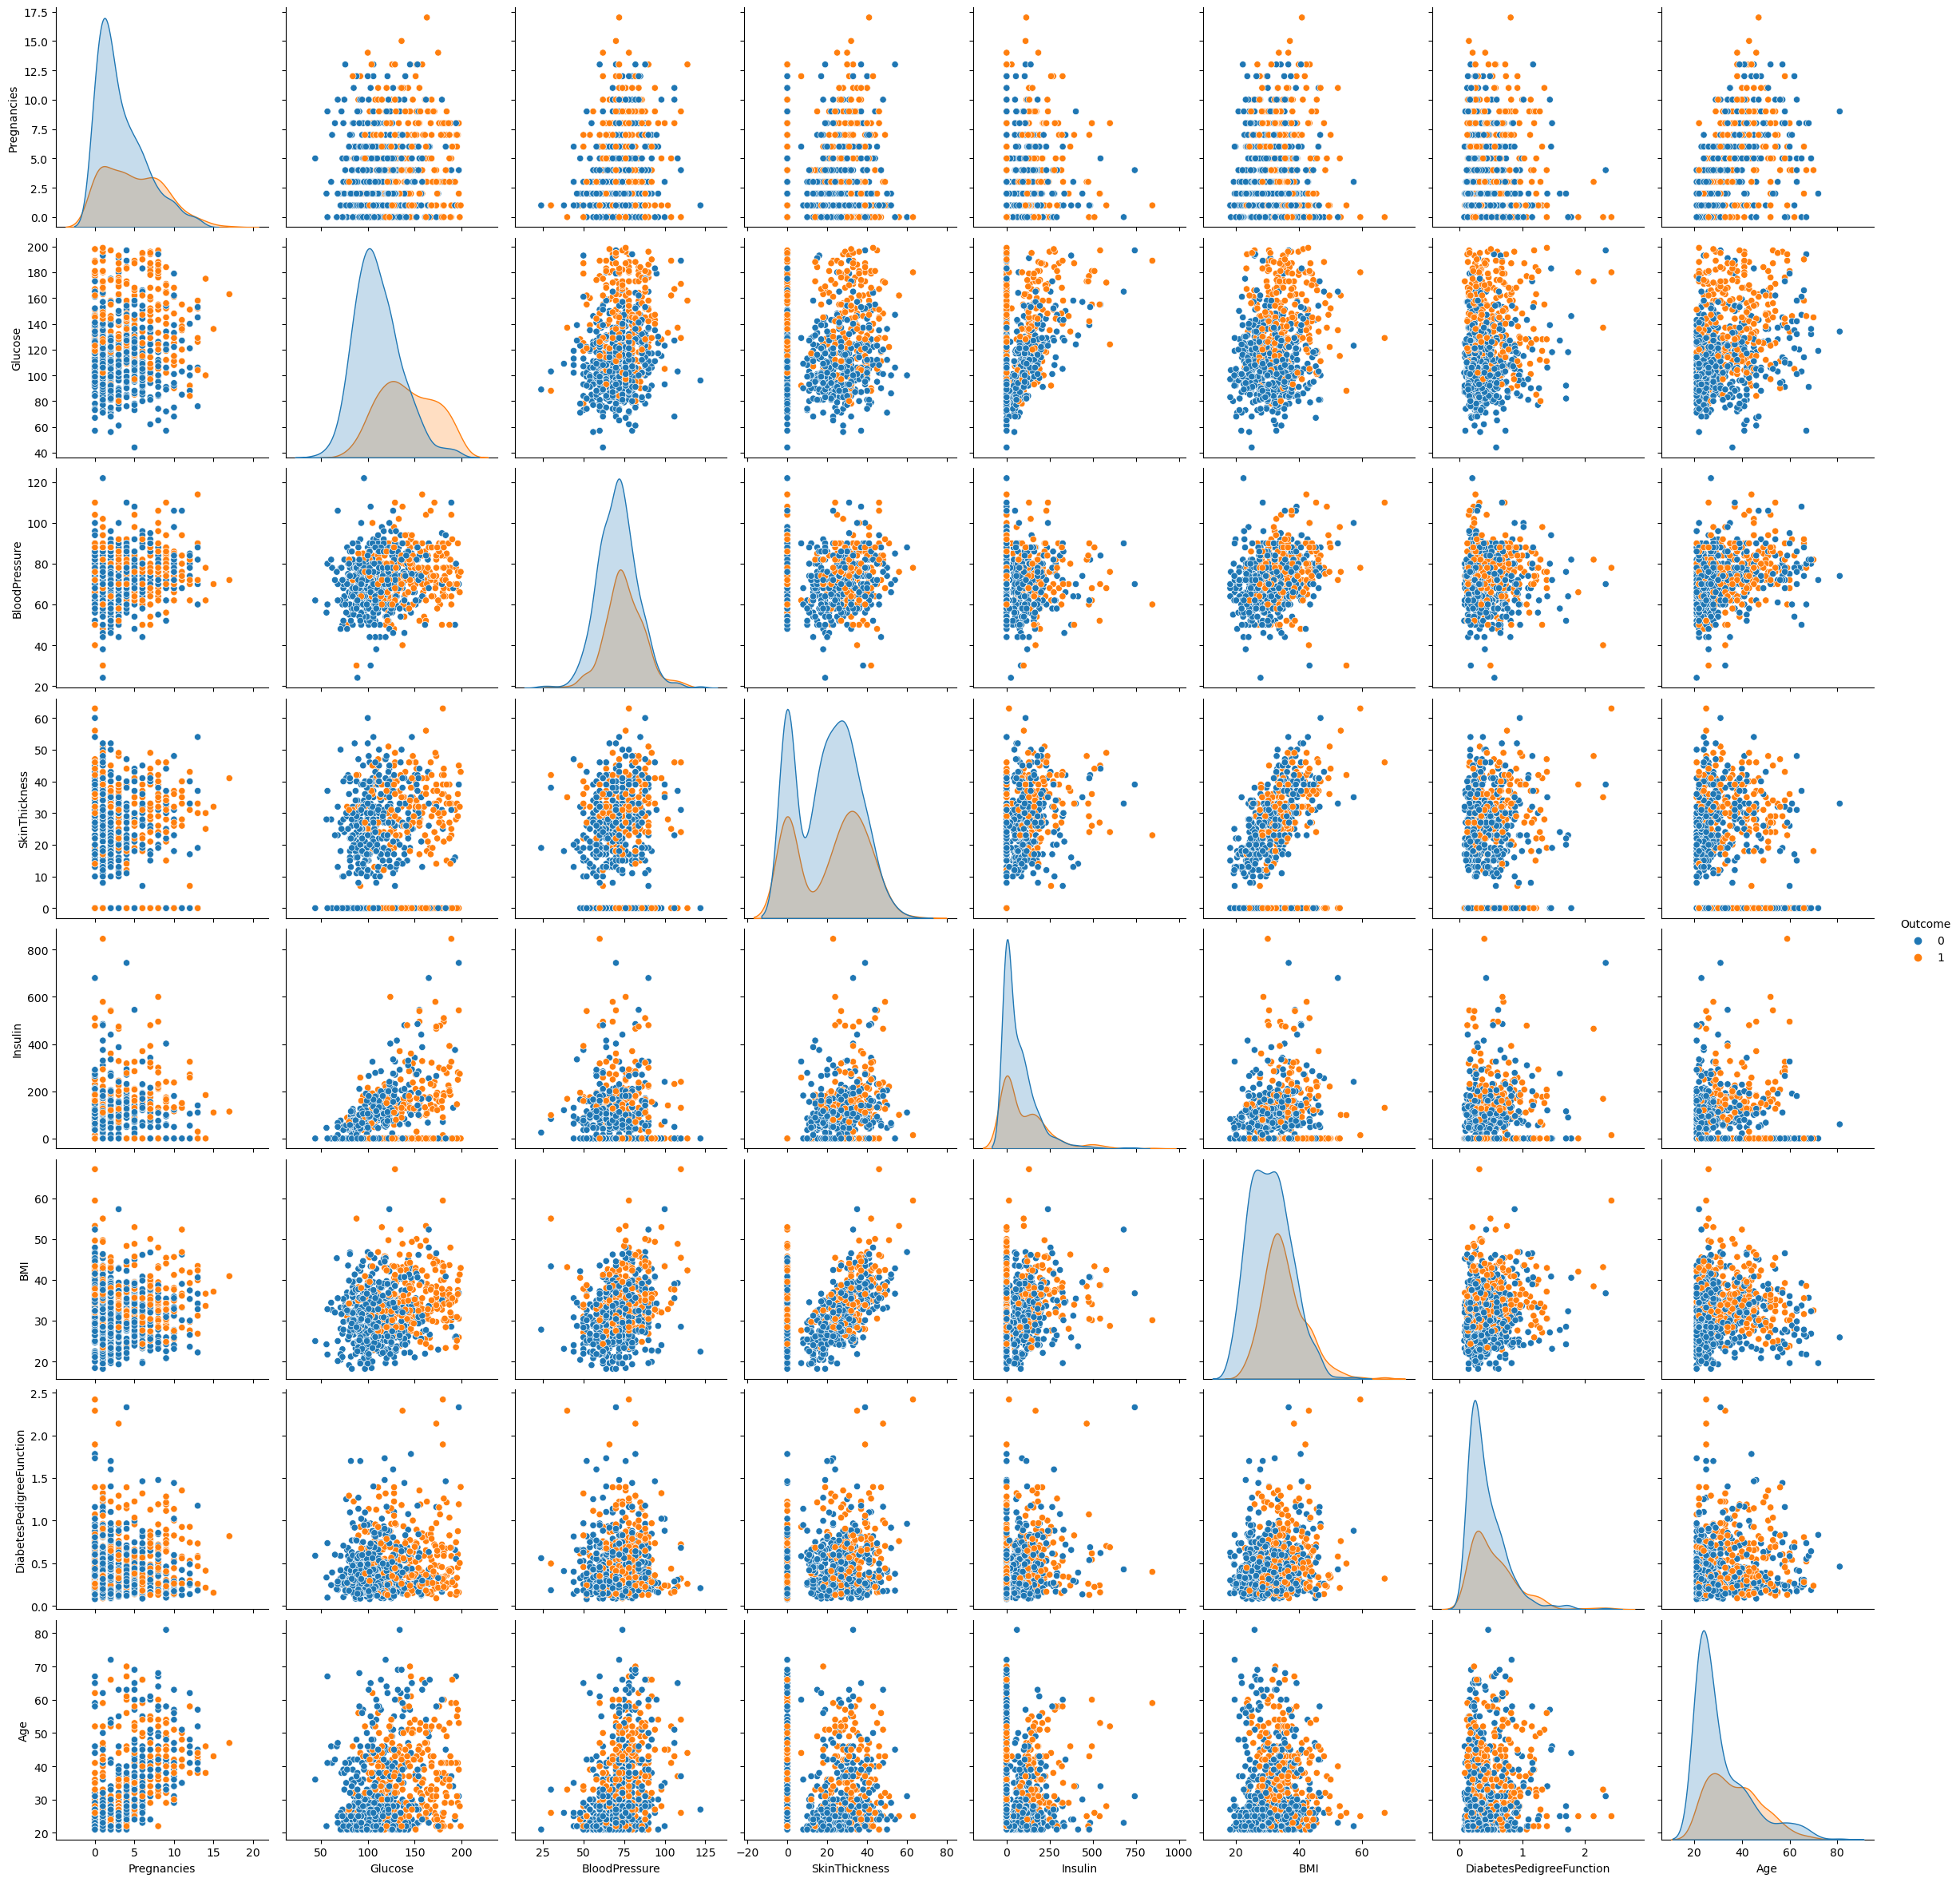

In [42]:
sns.pairplot(df, diag_kind='kde', hue='Outcome', height=3)
plt.show()

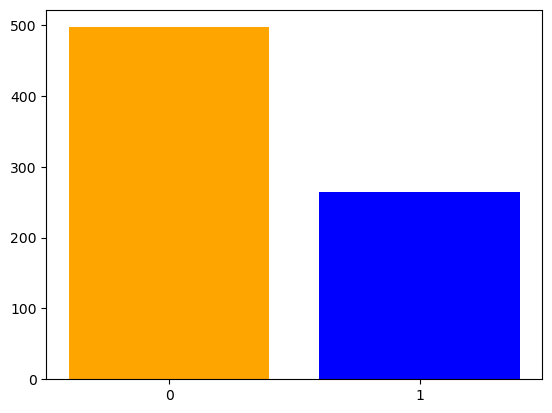

In [43]:
outcome_counts = df['Outcome'].value_counts()
plt.bar(outcome_counts.index, outcome_counts.values, color=['orange', 'blue'])
plt.xticks([0, 1])
plt.show()

### Seperating and Splitting Dataset

In [44]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

### Feature Scaling 

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
X_train

array([[-1.131605  ,  0.18895847,  0.64865978, ...,  0.60321791,
         1.05202991, -0.8400129 ],
       [ 1.83885812,  1.35100399,  0.9837892 , ..., -0.67533064,
        -0.89036139,  1.80044723],
       [ 1.2447655 , -0.70747665,  0.31353036, ...,  0.96002216,
        -0.86537887,  0.77833363],
       ...,
       [ 0.65067287,  0.88618578, -0.02159906, ...,  0.20181313,
         0.49929155,  1.45974269],
       [-1.131605  ,  0.98578968,  1.48648333, ...,  1.46549484,
        -0.30014924, -1.01036516],
       [ 1.2447655 ,  0.98578968,  0.48109507, ...,  1.58442959,
         0.15265902,  0.26727683]])

### HyperParameter Training on Support Vector Classifier

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy: 0.7536945812807883


### Training the Model

In [49]:
best_svm = SVC(**grid_search.best_params_, random_state=42)
best_svm.fit(X_train, y_train)

y_pred = best_svm.predict(X_test)

data = {'Actual': y_test, 'Prediction': y_pred}

cmp = pd.DataFrame(data)
cmp

,Actual,Prediction
0,1,0
1,0,0
2,1,1
3,0,0
4,0,1
...,...,...
148,0,0
149,1,1
150,0,0
151,0,0


### Model Accuracy

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) * 100

82.35294117647058